In [1]:
# importing libraries

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [150]:
df=pd.read_csv(r"C:\Users\Bn Maliq\Desktop\mydataset\diabetes.csv")

In [151]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


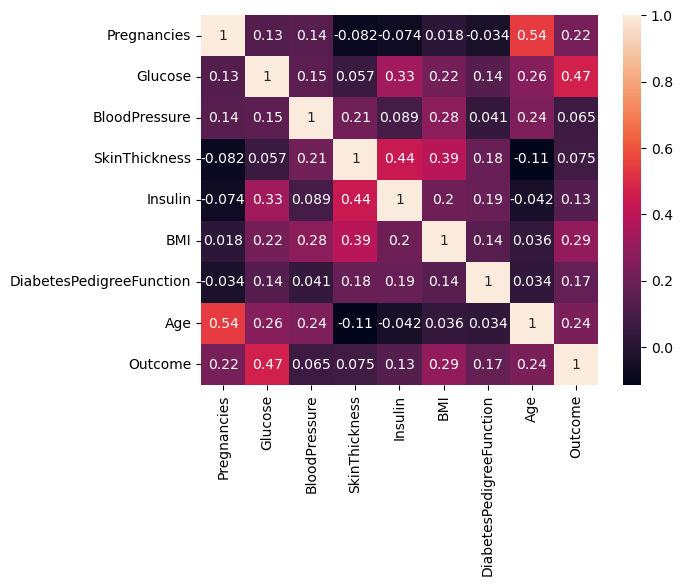

In [153]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [158]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,50-59
1,1,85,66,29,0,26.6,0.351,31,0,30-39
2,8,183,64,0,0,23.3,0.672,32,1,30-39
3,1,89,66,23,94,28.1,0.167,21,0,20-29
4,0,137,40,35,168,43.1,2.288,33,1,30-39


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   AgeGroup                  768 non-null    category
dtypes: category(1), float64(2), int64(7)
memory usage: 55.2 KB


In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [21]:
df.drop("Pregnancies", axis=1, inplace=True)

In [22]:
df.drop("Age", axis=1, inplace=True)

In [23]:
df.drop("SkinThickness", axis=1, inplace=True)

In [24]:
df.drop("BloodPressure", axis=1, inplace=True)

In [25]:
df.head()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,0,33.6,0.627,1
1,85,0,26.6,0.351,0
2,183,0,23.3,0.672,1
3,89,94,28.1,0.167,0
4,137,168,43.1,2.288,1


In [26]:
corr=df['Glucose'].corr(df['DiabetesPedigreeFunction'])
corr

0.13733729982837073

In [27]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

In [28]:
# df["Outcome"]=df["Outcome"].map({
# 1: "Diabetes Positive", 
# 0: "Diabetes Negative"
# })

In [29]:
df["Outcome"].head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   Insulin                   768 non-null    int64  
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 30.1 KB


In [31]:
def box_plot(df):
    for col in df: 
        plt.figure(figsize=(4,6))
        sns.boxplot(data=df[col])
        plt.title(f"Outliers in {col}")
        plt.show()


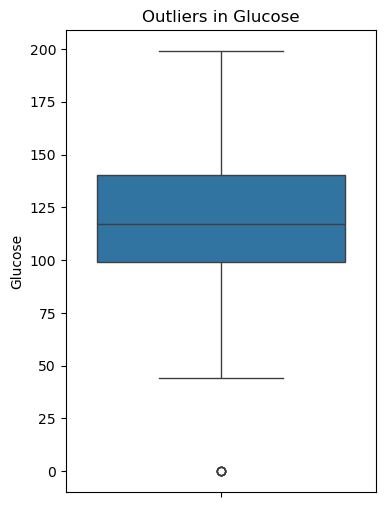

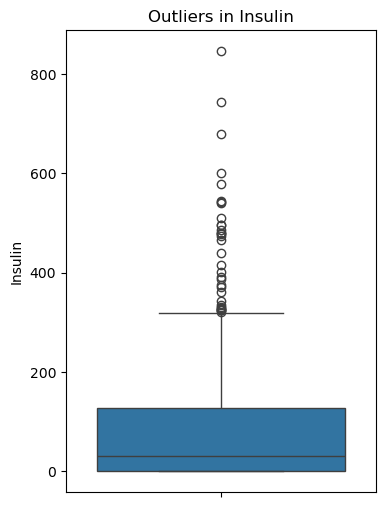

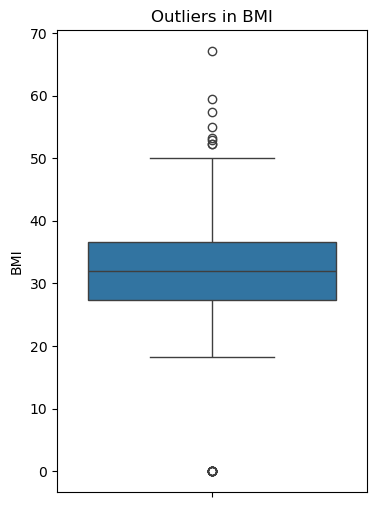

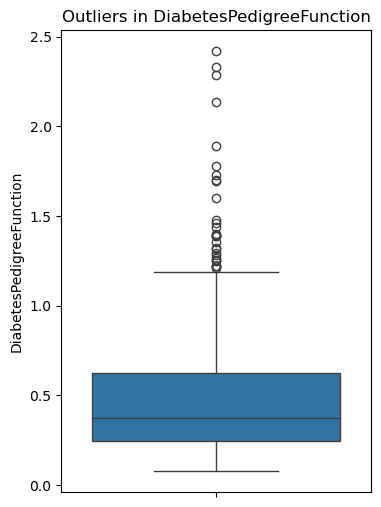

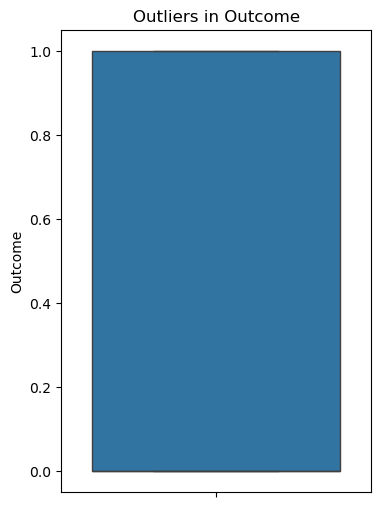

In [32]:
box_plot(df)

In [33]:
from scipy.stats import norm

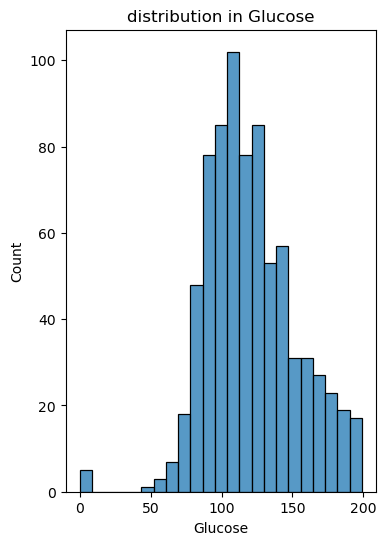

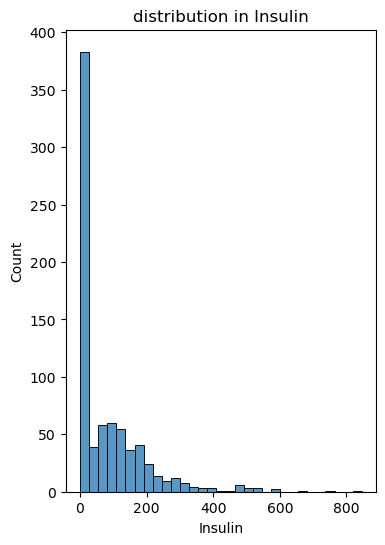

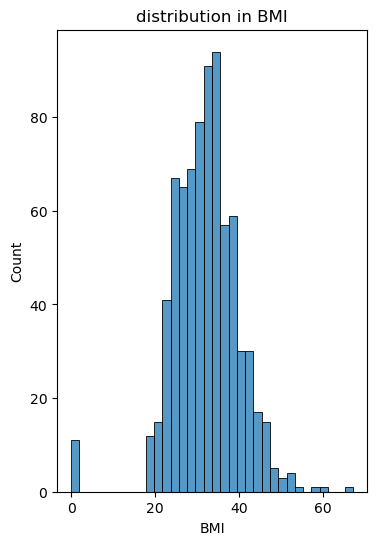

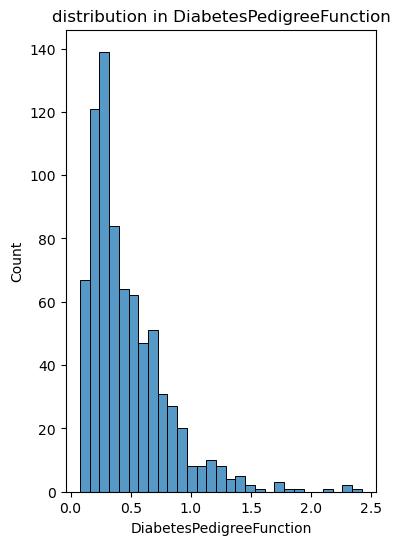

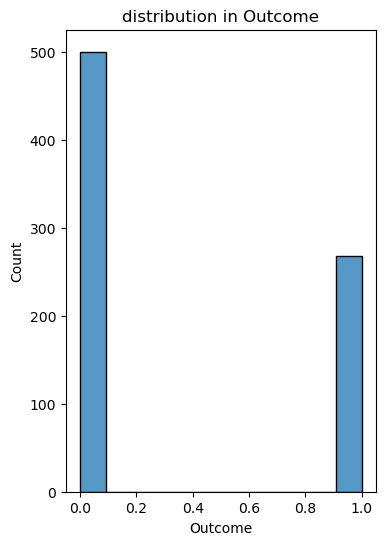

In [34]:

def histogram(df):
    for col in df: 
        plt.figure(figsize=(4,6))
        sns.histplot(data=df[col])
        plt.title(f"distribution in {col}")
        plt.show()

histogram(df)

In [35]:
df.head()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,0,33.6,0.627,1
1,85,0,26.6,0.351,0
2,183,0,23.3,0.672,1
3,89,94,28.1,0.167,0
4,137,168,43.1,2.288,1


In [36]:
Q1=df["Glucose"].quantile(0.25)
Q3=df["Glucose"].quantile(0.75)
Q1, Q3

(99.0, 140.25)

In [37]:
IQR=Q3-Q1
IQR

41.25

In [38]:
upper_limit=Q3+(1.5*IQR)
upper_limit

202.125

In [39]:
lower_limit=Q1-(1.5*IQR)
lower_limit

37.125

In [40]:
df["Glucose"].max(), df["Glucose"].min()

(199, 0)

In [41]:
new_df=df[(df.Glucose>lower_limit) & (df.Glucose<upper_limit)]
new_df.head()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,0,33.6,0.627,1
1,85,0,26.6,0.351,0
2,183,0,23.3,0.672,1
3,89,94,28.1,0.167,0
4,137,168,43.1,2.288,1


In [42]:
new_df.describe()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000
mean,121.686763,80.292267,31.986763,0.472477,0.348624
std,30.535641,115.457448,7.893221,0.331963,0.476847
min,44.000000,0.000000,0.000000,0.078000,0.000000
25%,99.000000,0.000000,27.300000,0.243500,0.000000
50%,117.000000,36.000000,32.000000,0.374000,0.000000
75%,141.000000,128.500000,36.550000,0.626500,1.000000
max,199.000000,846.000000,67.100000,2.420000,1.000000


In [54]:
new_df["Glucose_zscore"]=pd.DataFrame((df.Glucose-df.Glucose.mean())/df.Glucose.std())
new_df.head()

C:\Users\Bn Maliq\AppData\Local\Temp\ipykernel_1800\2110734237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Glucose_zscore"]=pd.DataFrame((df.Glucose-df.Glucose.mean())/df.Glucose.std())


,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Glucose_zscore
0,148,0,33.6,0.627,1,0.847771
1,85,0,26.6,0.351,0,-1.122665
2,183,0,23.3,0.672,1,1.942458
3,89,94,28.1,0.167,0,-0.997558
4,137,168,43.1,2.288,1,0.503727


In [55]:
new_df["Glucose_zscore"].max(), Glucose_zscore.min()

(2.44288623075234,
 Glucose   -3.78119
 dtype: float64)

In [56]:
new_df["insuline_zscore"]=pd.DataFrame((df.Insulin-df.Insulin.mean())/df.Insulin.std())
new_df.head()

C:\Users\Bn Maliq\AppData\Local\Temp\ipykernel_1800\1186276681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["insuline_zscore"]=pd.DataFrame((df.Insulin-df.Insulin.mean())/df.Insulin.std())


,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Glucose_zscore,insuline_zscore
0,148,0,33.6,0.627,1,0.847771,-0.692439
1,85,0,26.6,0.351,0,-1.122665,-0.692439
2,183,0,23.3,0.672,1,1.942458,-0.692439
3,89,94,28.1,0.167,0,-0.997558,0.123221
4,137,168,43.1,2.288,1,0.503727,0.765337


In [57]:
new_df["insuline_zscore"].max(), zscore_insuline.min()

(6.648506691892372,
 Insulin   -0.692439
 dtype: float64)

In [58]:
new_df["BMI_zscore"]=pd.DataFrame((df.BMI-df.BMI.mean())/df.BMI.std())
new_df.head()

C:\Users\Bn Maliq\AppData\Local\Temp\ipykernel_1800\2122941760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["BMI_zscore"]=pd.DataFrame((df.BMI-df.BMI.mean())/df.BMI.std())


,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Glucose_zscore,insuline_zscore,BMI_zscore
0,148,0,33.6,0.627,1,0.847771,-0.692439,0.203880
1,85,0,26.6,0.351,0,-1.122665,-0.692439,-0.683976
2,183,0,23.3,0.672,1,1.942458,-0.692439,-1.102537
3,89,94,28.1,0.167,0,-0.997558,0.123221,-0.493721
4,137,168,43.1,2.288,1,0.503727,0.765337,1.408828


In [63]:
new_df["BMI_zscore"].max(), new_df["BMI_zscore"].min()

(4.452905629565914, -4.057829473903509)

In [60]:
new_df["DiabetesPedigreeFunction_zscore"]=pd.DataFrame((df.DiabetesPedigreeFunction-df.DiabetesPedigreeFunction.mean())/df.DiabetesPedigreeFunction.std())
new_df.head()

C:\Users\Bn Maliq\AppData\Local\Temp\ipykernel_1800\2828059049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["DiabetesPedigreeFunction_zscore"]=pd.DataFrame((df.DiabetesPedigreeFunction-df.DiabetesPedigreeFunction.mean())/df.DiabetesPedigreeFunction.std())


,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Glucose_zscore,insuline_zscore,BMI_zscore,DiabetesPedigreeFunction_zscore
0,148,0,33.6,0.627,1,0.847771,-0.692439,0.203880,0.468187
1,85,0,26.6,0.351,0,-1.122665,-0.692439,-0.683976,-0.364823
2,183,0,23.3,0.672,1,1.942458,-0.692439,-1.102537,0.604004
3,89,94,28.1,0.167,0,-0.997558,0.123221,-0.493721,-0.920163
4,137,168,43.1,2.288,1,0.503727,0.765337,1.408828,5.481337


In [61]:
new_df["DiabetesPedigreeFunction_zscore"].max(), DiabetesPedigreeFunction_zscore.min()

(5.8797330723644725,
 DiabetesPedigreeFunction   -1.188778
 dtype: float64)

In [67]:
new_df[new_df["DiabetesPedigreeFunction_zscore"]<-1]

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Glucose_zscore,insuline_zscore,BMI_zscore,DiabetesPedigreeFunction_zscore
7,115,0,35.3,0.134,0,-0.184362,-0.692439,0.419502,-1.019762
80,113,0,22.4,0.140,0,-0.246915,-0.692439,-1.216690,-1.001653
81,74,0,0.0,0.102,0,-1.466709,-0.692439,-4.057829,-1.116343
96,92,0,31.6,0.130,0,-0.903727,-0.692439,-0.049793,-1.031835
135,125,140,33.8,0.088,0,0.128406,0.522374,0.229247,-1.158597
146,57,0,32.8,0.096,0,-1.998414,-0.692439,0.102411,-1.134452
149,90,0,27.3,0.085,0,-0.966281,-0.692439,-0.595191,-1.167651
154,188,0,47.9,0.137,1,2.098842,-0.692439,2.017643,-1.010708
180,87,0,23.2,0.084,0,-1.060111,-0.692439,-1.115221,-1.170670
194,85,0,24.4,0.136,0,-1.122665,-0.692439,-0.963017,-1.013726


In [68]:
new_df[new_df["DiabetesPedigreeFunction_zscore"]>5]

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome,Glucose_zscore,insuline_zscore,BMI_zscore,DiabetesPedigreeFunction_zscore
4,137,168,43.1,2.288,1,0.503727,0.765337,1.408828,5.481337
228,197,744,36.7,2.329,0,2.380333,5.763428,0.597073,5.605081
370,173,465,38.4,2.137,1,1.629690,3.342478,0.812696,5.025596
445,180,14,59.4,2.420,1,1.848628,-0.570958,3.476264,5.879733


In [78]:
df2=new_df[(new_df["Glucose_zscore"]>-3) & (new_df["Glucose_zscore"]<2)]

In [85]:
df3=df2[(df2["BMI_zscore"]>-4) & (df2["BMI_zscore"]<4)]

In [86]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 722 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Glucose                          722 non-null    int64  
 1   Insulin                          722 non-null    int64  
 2   BMI                              722 non-null    float64
 3   DiabetesPedigreeFunction         722 non-null    float64
 4   Outcome                          722 non-null    int64  
 5   Glucose_zscore                   722 non-null    float64
 6   insuline_zscore                  722 non-null    float64
 7   BMI_zscore                       722 non-null    float64
 8   DiabetesPedigreeFunction_zscore  722 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 56.4 KB


In [87]:
df4=df3[(df3["DiabetesPedigreeFunction_zscore"]>-1) & (df3["DiabetesPedigreeFunction_zscore"]<5)]

In [89]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 684 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Glucose                          684 non-null    int64  
 1   Insulin                          684 non-null    int64  
 2   BMI                              684 non-null    float64
 3   DiabetesPedigreeFunction         684 non-null    float64
 4   Outcome                          684 non-null    int64  
 5   Glucose_zscore                   684 non-null    float64
 6   insuline_zscore                  684 non-null    float64
 7   BMI_zscore                       684 non-null    float64
 8   DiabetesPedigreeFunction_zscore  684 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 53.4 KB


In [90]:
df4.drop("Glucose_zscore", axis=1, inplace=True)

C:\Users\Bn Maliq\AppData\Local\Temp\ipykernel_1800\2889392335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop("Glucose_zscore", axis=1, inplace=True)


In [92]:
df4.drop("insuline_zscore", axis=1, inplace=True)

C:\Users\Bn Maliq\AppData\Local\Temp\ipykernel_1800\4040181803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop("insuline_zscore", axis=1, inplace=True)


In [93]:
df4.drop("BMI_zscore", axis=1, inplace=True)

C:\Users\Bn Maliq\AppData\Local\Temp\ipykernel_1800\304925152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop("BMI_zscore", axis=1, inplace=True)


In [94]:
df4.drop("DiabetesPedigreeFunction_zscore", axis=1, inplace=True)

C:\Users\Bn Maliq\AppData\Local\Temp\ipykernel_1800\3150554409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop("DiabetesPedigreeFunction_zscore", axis=1, inplace=True)


In [95]:
df4.head()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,0,33.6,0.627,1
1,85,0,26.6,0.351,0
2,183,0,23.3,0.672,1
3,89,94,28.1,0.167,0
5,116,0,25.6,0.201,0


In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
from sklearn.pipeline import Pipeline

In [103]:
from sklearn.compose import ColumnTransformer

In [104]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [105]:
from sklearn.impute import SimpleImputer

In [106]:
from sklearn. ensemble import RandomForestRegressor

In [107]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [127]:
X=new_df.drop(["Outcome"], axis=1)
y=new_df["Outcome"]

In [128]:
# selecting the numerical_col

In [129]:
numerical_col=["Glucose", "DiabetesPedigreeFunction", "Insulin", "BMI"]

In [130]:
numerical_pipeline=Pipeline([
    ("Imputer", SimpleImputer(strategy="mean")), 
    ("scaler", StandardScaler())

])

In [131]:
# column transformation

In [132]:
preprocessor = ColumnTransformer([
("num", numerical_pipeline, numerical_col)
])

In [133]:
# join with pipeline

In [134]:
pipeline=Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

In [135]:
# splitting data into test and train data

In [136]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [137]:
# training

In [138]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [139]:
prediction=pipeline.predict(X_test)

In [140]:
# testing the accuracy of the model

In [141]:
mse=mean_squared_error(y_test, prediction)
print(mse)

0.16153986928104577


In [142]:
rmse=np.sqrt(mse)
print(rmse)

0.40192022750919837


In [143]:
r2=r2_score(y_test, prediction)
print(r2)

0.30384999999999995


In [144]:
MAE=mean_absolute_error(y_test, prediction)
MAE

0.31137254901960787

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
# hyperparameter tunning

In [88]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
param_grid = {
    "model__n_estimators": [200, 500],
    "model__max_features": ["auto", "sqrt", "log2"], 
    "model__max_depth": [4, 5, 6, 7, 8]
}

In [90]:
grid_search=GridSearchCV(pipeline, param_grid=param_grid, n_jobs=1)

In [91]:
grid_search.fit(X_train, y_train)

,estimator,Pipeline(step...Regressor())])
,param_grid,"{'model__max_depth': [4, 5, ...], 'model__max_features': ['auto', 'sqrt', ...], 'model__n_estimators': [200, 500]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...)]"


In [92]:
grid_search.best_params_

{'model__max_depth': 4,
 'model__max_features': 'sqrt',
 'model__n_estimators': 500}

In [93]:
pipeline=Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(max_depth=4, 
                                    max_features='sqrt',
                                   n_estimators=500))
])

In [94]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [95]:
predicting2=pipeline.predict(X_test)

In [96]:
# testing again for the accuracy of the model

In [97]:
mse2=mean_squared_error(y_test, predicting2)
print(mse)

0.16059346405228758


In [98]:
rmse2=np.sqrt(mse2)
print(rmse2)

0.3862355330545001


In [99]:
r22=r2_score(y_test, predicting2)
print(r22)

0.32192132880775526


In [100]:
MAE2=mean_absolute_error(y_test, predicting2)
MAE2

0.31770457098651406

In [101]:
# plotting actual vs predicted value

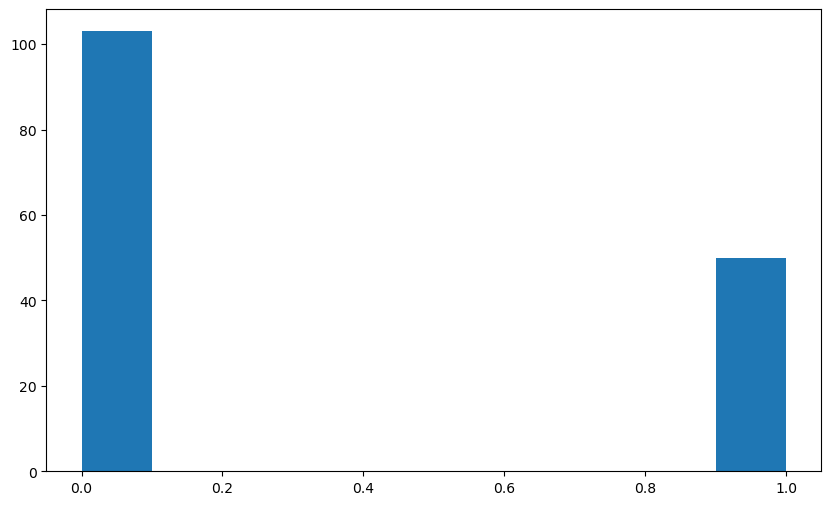

In [102]:
plt.figure(figsize=(10,6))
plt.hist(y_test, label="Actual Value")
plt.show()

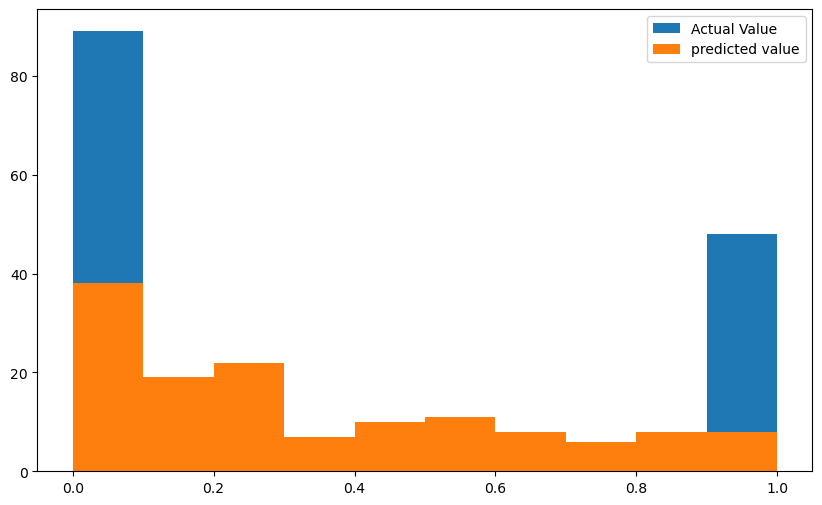

In [126]:
plt.figure(figsize=(10,6))
plt.hist(y_test, label="Actual Value")
plt.hist(prediction, label="predicted value")
plt.legend()
plt.show()

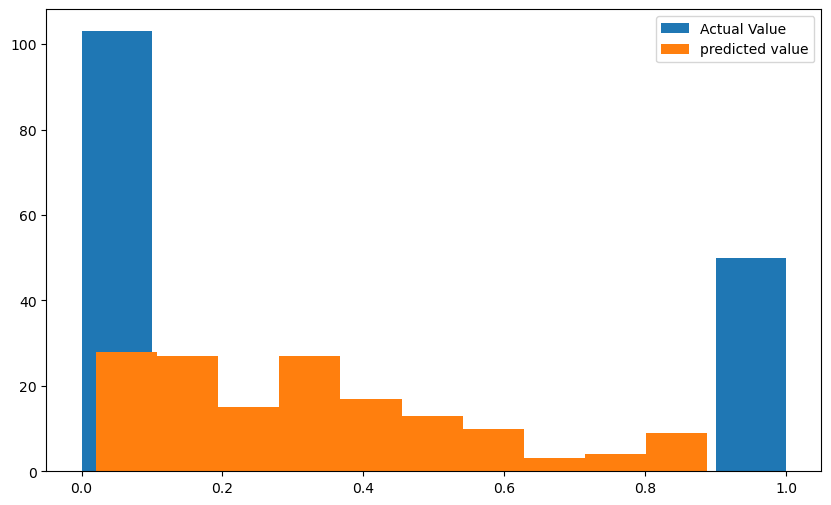

In [105]:
plt.figure(figsize=(10,6))
plt.hist(y_test, label="Actual Value")
plt.hist(predicting2, label="predicted value")
plt.legend()
plt.show()

In [145]:
for col in ["Glucose", "Insulin", "BMI"]:
    q_low = df[col].quantile(0.01)
    q_high = df[col].quantile(0.99)
    df[col] = np.clip(df[col], q_low, q_high)

In [146]:
df.head()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148,0.0,33.6,0.627,1
1,85,0.0,26.6,0.351,0
2,183,0.0,23.3,0.672,1
3,89,94.0,28.1,0.167,0
4,137,168.0,43.1,2.288,1


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   Insulin                   768 non-null    float64
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 30.1 KB


In [148]:
df["AgeGroup"] = pd.cut(df["Age"], bins=[20,30,40,50,60,100], labels=["20s","30s","40s","50s","60+"])

KeyError: 'Age'